In [1]:
import psycopg2
from config import local_host, local_name, local_port, local_user
from creds import local_db_password
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
conn = psycopg2.connect(dbname=local_name, user =local_user, host=local_host, password=local_db_password, port =local_port)
cur = conn.cursor()

In [2]:
goalkeep_select = """
select
	player_id,
	current_team_id,
	minutes / 90 as est_games,
	coalesce(goals_conceded * 1.00 / nullif(minutes, 0), 0) as goals_conceded_per_min,
	coalesce(saves *1.00 / nullif(goals_conceded + saves, 0), 0) as save_percentage,
	coalesce(passes_accuracy *1.00 / nullif(passes_total, 0), 0) as pass_accuracy
from ffl_prod.player_summaries
where position = 'Goalkeeper' and minutes > 0
"""

In [3]:
df = pd.read_sql(goalkeep_select, conn)
df.head()

C:\Users\STEKIT~1\AppData\Local\Temp/ipykernel_2216/509631497.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(goalkeep_select, conn)


,player_id,current_team_id,est_games,goals_conceded_per_min,save_percentage,pass_accuracy
0,253,48,29,0.019637,0.722513,0.593315
1,280,40,28,0.011905,0.734513,0.850552
2,281,40,10,0.012222,0.717949,0.793282
3,526,33,38,0.016959,0.719807,0.703569
4,557,65,5,0.026667,0.454545,0.790850


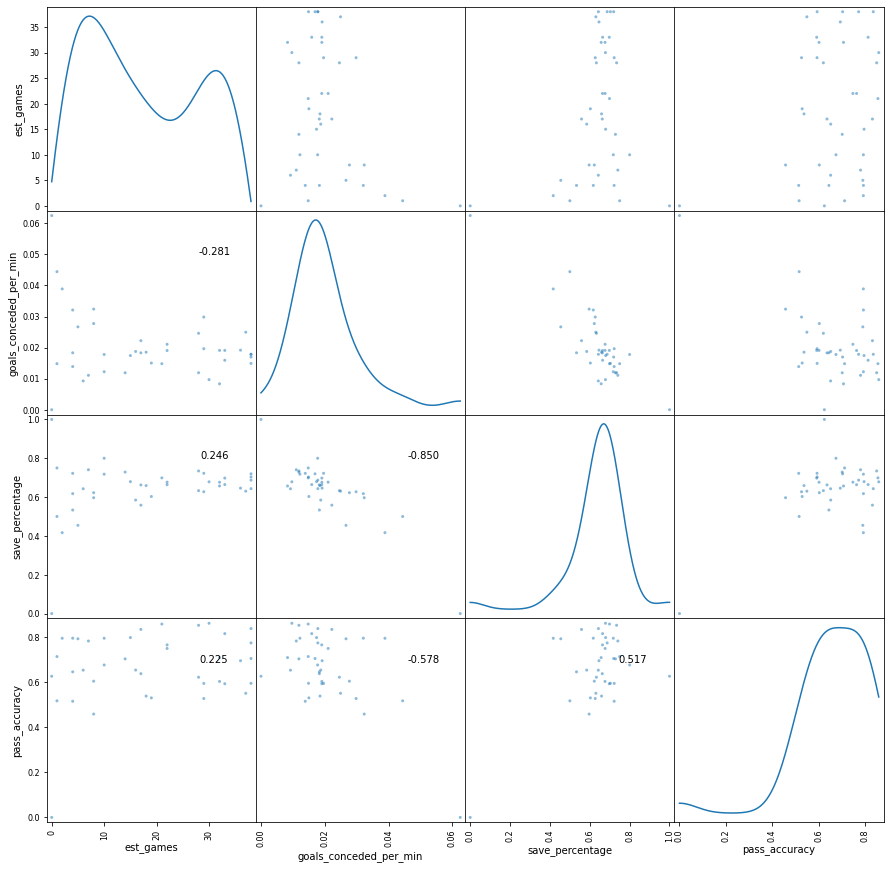

In [4]:
qual_cols = ['player_id', 'current_team_id']
axes = pd.plotting.scatter_matrix(df.drop(qual_cols, axis=1), figsize=(15,15), diagonal='kde', alpha=0.5)
corr = df.drop(qual_cols, axis=1).corr().to_numpy()
for i, j in zip(*plt.np.tril_indices_from(axes, k=-1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')